
# Assignment 3  <font color="blue"> (15 points) </font>

***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

### **Importing Libraries**

In [20]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#from sklearn import linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

#from sklearn.svm import SVR
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

#### A.1.1. Generate 100 points equally distanced from  −20 to 20 and save them in a numpy array x1.

In [3]:
frm,to,cnt=-20,20,100
stp = (to-frm)/(cnt+1)
x1 = np.arange(frm+stp,to,stp)
#print(min(x1), max(x1), len(x1))

#check points are eaually distant: subtract each point from the previous
#dist=[]
#for i in range(len(x1)-1):
#    dist.append(x1[i+1]-x1[i])
#print(min(dist),max(dist),min(dist)-max(dist), len(dist))

#### A.1.2. Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, respectively.

In [4]:
# Define X as a numpy array of 2 dimensions 6*100
X = np.empty(shape=(6,100))
X[0].fill(0) # will not be used in this problem - added for the sake to make index matching the power
X[1] = x1

for i in range(4):
    X[i+2,:] = np.array([pow(e,i+2) for e in x1])  # define X[2] as X1^2 and X3 as X[3] as X1^3 same applies to X4 and X5

# Validate
#print(type(x1))
#print(x1.ndim)
#print(x1.shape)
#print(x1[0])

#print(type(X))
#print(X.ndim)
#print(X.shape)
#print(X[1,:])
#print(X[:,1])

# creating variables with exact variable names asked in the questions
x2 = X[2] #np.array([pow(z,2) for z in x1])
x3 = X[3] #np.array([pow(z,3) for z in x1])
x4 = X[4] #np.array([pow(z,4) for z in x1])
x5 = X[5] #np.array([pow(z,5) for z in x1])

#for i in range(100):
#    if X[0][i] != 0 and X[1][i] != x1[i] and X[2][i] != x2[i] and X[3][i] != x3[i] and X[4][i] != x4[i] and X[5][i] != x5[i]:
#        print("error")

#    print(X[0][i] - 0 + X[1][i] - x1[i] + X[2][i] - x2[i] + X[3][i] - x3[i] + X[4][i] - x4[i] + X[5][i] - x5[i])

#for i in range(4):
#print(min(x1), max(x1), len(x1))
#print(min(x2), max(x2), len(x2))
#print(min(x3), max(x3), len(x3))
#print(min(x4), max(x4), len(x4))
#print(min(x5), max(x5), len(x5))
#type(x2), type(x3), type(x4) , type(x5)

#### A.2. Create your response y, a new numpy array, defined as  𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀  , where  𝜀∼N(0,4)

In [5]:
b0 = 1.75
b1 = 5
b3 = 0.05
b5 = -10.3
##------------------------------------------------------------------------
# generate epsilon : eps
mu, sigma = 0, 4 # mean and standard deviation
#eps = np.random.normal(mu, sigma, 10000000)
eps = np.random.normal(mu, sigma, 100)
#eps
#print(abs( np.mean(eps)))
#print(abs(np.std(eps)))
##------------------------------------------------------------------------
y = b0 + b1*x1 + b3*x3 + b5*x5 + eps
#y

In [6]:
# transpose X and consider ONLY columns from x1 to x5 (ignore X0)
#X_trnsps = np.transpose(X)
X_IndVar = np.transpose(X)[:,1:]

#X_IndVar.shape
#X_IndVar[0,:]
#X_IndVar[:,0]
'''
# convert numpy array to pandas data frame

df = pd.DataFrame(data=X_trnsps[:,1:]) # values
            #index=data[1:,0],    # 1st column as index
            #columns=data[0,1:])

# rename column names
for i in range(5):
  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)

df.index.names = ['Index']

print(df.keys())
df.head()
df.shape
'''

'\n# convert numpy array to pandas data frame\n\ndf = pd.DataFrame(data=X_trnsps[:,1:]) # values\n            #index=data[1:,0],    # 1st column as index\n            #columns=data[0,1:])\n\n# rename column names\nfor i in range(5):\n  df.rename({df.columns[i]:"x"+str(i+1)},axis=1,inplace=True)\n\ndf.index.names = [\'Index\']\n\nprint(df.keys())\ndf.head()\ndf.shape\n'

#### A.3. Using  5-fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5, and for  10  different pre-determined tuning parameters.

#### Questions :


1.   reasonable train-test proportion in cross validation ? kf = KFold(n_splits=k, shuffle=True, random_state=47) - ***should we use BOTH: train test split then 5-fold cross validation***
***=> ANSWER in session - yes - use both***

2. may we use ***StratifiedKFold*** ... not covered in the sessions - startify covered for the train-test-split only ?  
3. Is standardization strictly necessary with Lasso in this case ? as the scales of the features are meaningful and should be preserved. !
***=> ANSWER in session - no need to use startify - BUT yes, we need to use standardization ***

4. clarification required 10 different ***pre-determined*** tuning parameters: ***any parameters ? 0.1,0.2,....0.9*** - covered only with ***optuna*** library in the session - so should we use that or any other way is ok ? also ***it was random ***- but here in this question , it is asking for ***predetermined*** ?!
6. Also, there is other ways not covered to find optimal alpha
* Using ***sklearn.model_selection.GridSearchCV*** to perform hyperparameter tuning over a range of α values

***=> ANSWER in session - use manual or sklearn.model_selection.GridSearchCV but not optuna***

* ***LassoCV*** in sklearn automatically performs cross-validation to find the optimal α

***=> ANSWER in session - don't rememeber the answer - better not to use it and to use the standard way LASSO ***

***=> in the session - some comments provided for Part B (Jaafar question)***

In [7]:
# Standardize/normalize Data first - check code in python L4 or L5

In [8]:
# 5-fold cross-validation

k=5 # five folds as requested
kf = KFold(n_splits=k, shuffle=True, random_state=47)

In [9]:
'''
session 5
random_state = 42
def objective(trial):

  alpha = trial.suggest_float("alpha", 0.1, 1000)
  lasso_regression = Lasso(alpha=alpha, random_state=random_state)
  lasso_regression.fit(X_train,y_train)
  y_pred_lasso = lasso_regression.predict(X_test)
  mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
  r2 = lasso_regression.score(X_test,y_test)

  return mae_lasso
#####################################################################
chatGPT
#1)Initial Train-Test Split:
#First, split the dataset into a training set and a test set. The test set will be held out for final evaluation.

#2-Set Up K-Fold Cross-Validation:
#Use KFold to create 5 splits of the training data.

#3-Perform Cross-Validation:
Perform 5-fold cross-validation on the training set.

#4- Final Model Evaluation:
After performing cross-validation, train the model on the entire training set and evaluate it on the test set.


# complete code for above 4 steps
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Create a sample dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=47)

# Initialize the Lasso model
model = Lasso()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_score = model.score(X_test, y_test)
print(f'Test score: {test_score}')

'''

'\nsession 5\nrandom_state = 42\ndef objective(trial):\n\n  alpha = trial.suggest_float("alpha", 0.1, 1000)\n  lasso_regression = Lasso(alpha=alpha, random_state=random_state)\n  lasso_regression.fit(X_train,y_train)\n  y_pred_lasso = lasso_regression.predict(X_test)\n  mae_lasso = mean_absolute_error(y_test, y_pred_lasso)\n  r2 = lasso_regression.score(X_test,y_test)\n\n  return mae_lasso\n#####################################################################\nchatGPT\n#1)Initial Train-Test Split:\n#First, split the dataset into a training set and a test set. The test set will be held out for final evaluation.\n\n#2-Set Up K-Fold Cross-Validation:\n#Use KFold to create 5 splits of the training data.\n\n#3-Perform Cross-Validation:\nPerform 5-fold cross-validation on the training set.\n\n#4- Final Model Evaluation:\nAfter performing cross-validation, train the model on the entire training set and evaluate it on the test set.\n\n\n# complete code for above 4 steps\nimport numpy as np\nfr

In [10]:
cv_results_m2TO5 = []

for i in range(-5,5):
  crnt_alpha = 10**i
  print("@ crnt_alpha=", crnt_alpha, ":")
  lasso_rg = linear_model.Lasso(alpha=crnt_alpha)
  lasso_rg.fit(X_IndVar, y)

# use cross_val_score and store cv results in cv_results_m2TO5 list for later use
  #cv_results_m2TO5.append(cross_val_score(LnrDscAnl2_5, X_all_data_train_pca[m-2], y_all_data_train, cv=kf, scoring='accuracy'))
  #print("accuracy list:", cv_results_m2TO5[m-2])
  #print("accuracy mean:",cv_results_m2TO5[m-2].mean())
  #print("-----------------------------------------------------------------------")

# train a lasso regression model


# how to come up with alpha in the parameters for lasso - check lecture & python for (Lec4 or Lec5) ?

# including all 𝑥1,𝑥2,𝑥3,𝑥4,𝑥5 [but only x1,x3,x5 are used in creating y]
# what is for 10 different pre-determined tuning parameters.??





@ crnt_alpha= 1e-05 :


Lasso(alpha=1e-05)

@ crnt_alpha= 0.0001 :


Lasso(alpha=0.0001)

@ crnt_alpha= 0.001 :


Lasso(alpha=0.001)

@ crnt_alpha= 0.01 :


Lasso(alpha=0.01)

@ crnt_alpha= 0.1 :


Lasso(alpha=0.1)

@ crnt_alpha= 1 :


Lasso(alpha=1)

@ crnt_alpha= 10 :


Lasso(alpha=10)

@ crnt_alpha= 100 :


Lasso(alpha=100)

@ crnt_alpha= 1000 :


Lasso(alpha=1000)

@ crnt_alpha= 10000 :


Lasso(alpha=10000)

#### A.4. Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. Does the best model chosen perform variable selection?

## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data.
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


#### **B.1. Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree  d  for the polynomial. What degree was chosen? Make a plot of the resulting polynomial fit to the data.**

In [11]:
# load the wage dataframe
wage_df = pd.read_csv("Wage.csv")
wage_df.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [12]:
wage_df.shape

(3000, 13)

In [13]:
wage_df.describe()

,Unnamed: 0,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,218883.373000,2005.791000,42.414667,4.653905,111.703608
std,145654.072587,2.026167,11.542406,0.351753,41.728595
min,7373.000000,2003.000000,18.000000,3.000000,20.085537
25%,85622.250000,2004.000000,33.750000,4.447158,85.383940
50%,228799.500000,2006.000000,42.000000,4.653213,104.921507
75%,374759.500000,2008.000000,51.000000,4.857332,128.680488
max,453870.000000,2009.000000,80.000000,5.763128,318.342430


In [14]:
wage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


In [15]:
# Defining independent and dependent variables
data_x = wage_df['age']   # indep. var.
data_y = wage_df['wage']  # depend. var.

# Dividing data into train and validation datasets
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

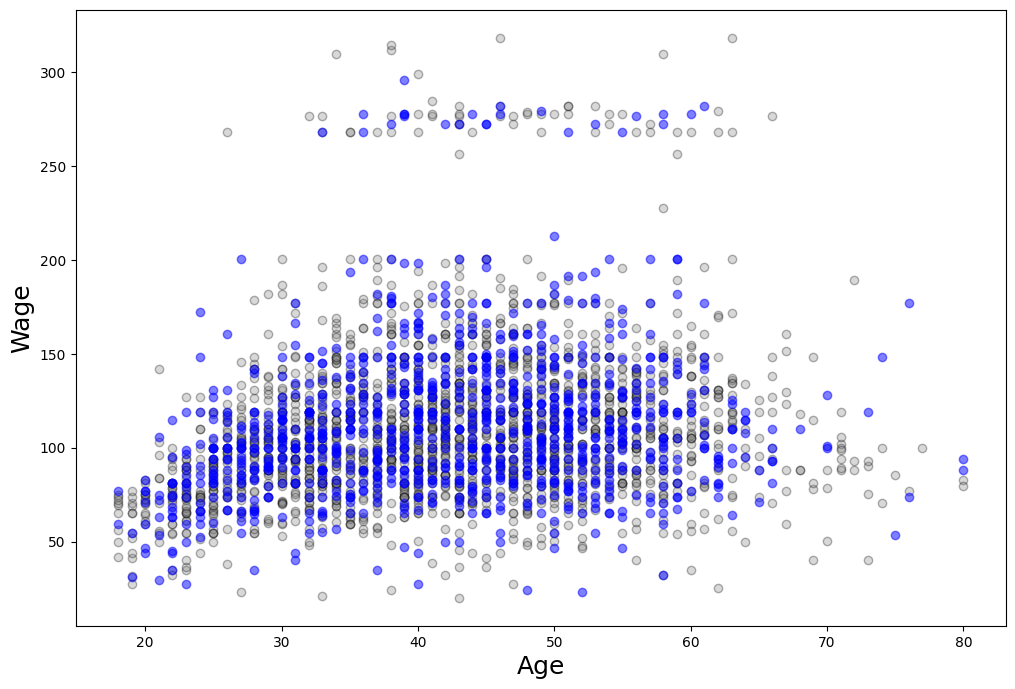

In [16]:
# Visualize the relationship b/w age and wage
size = plt.figure(figsize = (12,8))

# Training data
_ = plt.scatter(train_x, train_y, facecolor='grey', edgecolor='k', alpha=0.3)

# Test data
_ = plt.scatter(test_x, test_y, facecolor = "blue", alpha = .5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Wage', fontsize=18)
plt.show()

In [27]:
x_train = np.array(train_x).reshape(-1,1)

# construct polynomial features based on degree
rmses = []
r2s = []
for dgr in range(1,11):
  polynomial_features = PolynomialFeatures(degree=(dgr+1))
  x_train_poly = polynomial_features.fit_transform(x_train)
  print(x_train_poly.shape)

  # Fit the polynomial regression model
  eqv_lnr_model = LinearRegression()
  eqv_lnr_model.fit(x_train_poly, train_y)
  y_poly_pred = eqv_lnr_model.predict(x_train_poly)

  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(train_y, y_poly_pred))
  r2 = r2_score(train_y, y_poly_pred)
  rmses.append(rmse)
  r2s.append(r2)
  print("RMSE:", rmse, "R2: ", r2)

print("Best RMSE:",min(rmses)," at degree: ", rmses.index(min(rmses))+1)
print("Best R2:",max(r2s)," at degree: ", r2s.index(max(r2s))+1)

print("Worst RMSE:",max(rmses)," at degree: ", rmses.index(max(rmses))+1)
print("Worst r2s:",min(r2s)," at degree: ", r2s.index(min(r2s))+1)

#y_poly_pred.shape
# rms is the square root of mean squared error
#rms = sqrt(mean_squared_error(test_y, ypred))
#print(rms)

'''
for i in range(1,10):
    polynomial_features = PolynomialFeatures(degree=i)

    x_train_p = polynomial_features.fit_transform(x_train)
    x_train_p.shape
    model_poly = sm.OLS(train_y, x_train_p).fit()
    ypred = model_poly.predict(x_train_p)
    ypred.shape
    # rms is the square root of mean squared error
    #rms = sqrt(mean_squared_error(test_y, ypred))
    #print(rms)
'''

(2010, 3)


LinearRegression()

RMSE: 40.23330688411127 R2:  0.08231158073259803
(2010, 4)


LinearRegression()

RMSE: 40.19803698684614 R2:  0.08391982981084767
(2010, 5)


LinearRegression()

RMSE: 40.14799319262766 R2:  0.08619932376449801
(2010, 6)


LinearRegression()

RMSE: 40.141522894801504 R2:  0.08649383841497393
(2010, 7)


LinearRegression()

RMSE: 40.115257959984966 R2:  0.08768887679864956
(2010, 8)


LinearRegression()

RMSE: 40.104004089206576 R2:  0.08820068162623296
(2010, 9)


LinearRegression()

RMSE: 40.10150431737813 R2:  0.08831434704515617
(2010, 10)


LinearRegression()

RMSE: 40.10123594458917 R2:  0.0883265496199368
(2010, 11)


LinearRegression()

RMSE: 40.102266982368945 R2:  0.08827966917689123
(2010, 12)


LinearRegression()

RMSE: 40.105738327149275 R2:  0.08812182111342659
Best RMSE: 40.10123594458917  at degree:  8
Best R2: 0.0883265496199368  at degree:  8
Worst RMSE: 40.23330688411127  at degree:  1
Worst r2s: 0.08231158073259803  at degree:  1


'\nfor i in range(1,10):\n    polynomial_features = PolynomialFeatures(degree=i)\n\n    x_train_p = polynomial_features.fit_transform(x_train)\n    x_train_p.shape\n    model_poly = sm.OLS(train_y, x_train_p).fit()\n    ypred = model_poly.predict(x_train_p)\n    ypred.shape\n    # rms is the square root of mean squared error\n    #rms = sqrt(mean_squared_error(test_y, ypred))\n    #print(rms)\n'


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters.
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data.
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  
